<div align="center"><h2>PHASE 5 CAPSTONE PROJECT</h2></div>
<div align="center"><h2>Predictive Modeling for Flight Passenger Preferences and Booking Patterns in Horizon Airlines</h2></div>

# Group Members

* Kamande Karigi
* Lewis Otsieka
* Marion Jelimo
* Titus Kilonzo Mutuku
* Yusra Noor

# BUSINESS UNDERSTANDING

## INTRODUCTION
Horizon Airlines, a prominent player in the aviation industry, stands as a cornerstone of reliable air travel services. As a leading airline company, Horizon Airlines is dedicated to providing safe, efficient, and seamless travel experiences for passengers across Kenya. With a fleet of modern aircraft and a commitment to operational excellence, Horizon Airlines has positioned itself as a trailblazer in the aviation sector. Recognizing the challenges and complexities inherent in managing a vast network of flights, passenger preferences, and operational logistics, Horizon Airlines has enlisted our expertise. Our team has been entrusted with the task of implementing advanced analytics to derive valuable insights from the company's extensive datasets. By harnessing the power of data-driven decision-making, our goal is to assist Horizon Airlines in optimizing its operations, enhancing customer experiences, and maintaining a competitive edge in the dynamic aviation landscape.


## PROBLEM STATEMENT
In the aftermath of the COVID-19 pandemic, the aviation industry is grappling with a multifaceted challenge to revitalize its operations and regain passenger trust. The problem revolves around understanding the intricate dynamics of customer behavior post-COVID, with a focus on influencing factors such as travel preferences, safety concerns, and the demand for additional services. It is crucial for airlines to tailor their services effectively with respect to the specific needs and concerns of passengers, utilising available data to inform effective safety measures, extra baggage, preferred seating, in-flight meals and other passenger preferences. This project provides an opportunity to investigate post-pandemic travel, and guide Horizon airlines to craft strategies that align with evolving customer expectations and foster a robust recovery.

## DEFINING METRICS OF SUCCESS


## RESEARCH QUESTIONS

1. Booking conversion analysis:
What are the primary factors inluencing booking completion and how do the vary across different sales channels?
Can the `purchase_lead` time be optimized to improve booking conversion rates without adversely affecting other aspects? 

2. Flight duration:
Which features are most significant in trying to predict flight duration?
How do aspects such as num of passengers and length of stay relate to flight duration?

3. Customer segmentation:
What are the distinct customer segments based on booking patterns, and how do these segments differ in terms of preferences and behaviors?
How can personalized marketing strategies be developed for each identified segment?

4. Ancillary Service Adoption:
What factors drive customers to opt for extra baggage, preferred seats, or in-flight meals, and are there cross-correlations between these preferences?
Can targeted promotions or bundling strategies be implemented to increase the adoption of these services?

5. Operational Efficiency Optimization:
How do `flight_day` and f`light_hour` affect booking patterns, and how can flight schedules be optimized to match demand?
Are there specific routes (`route`) that exhibit distinct patterns in terms of demand and booking behavior?

6. Route-specific Strategies:
How do customer preferences and behaviors vary across different flight routes, and what marketing or pricing strategies can be implemented for each route?
Are there external factors, such as events or seasons, that significantly impact booking patterns on specific routes?



## THE MAIN OBJECTIVES

To develop a model that learns over the available customer booking data, whose inferences improve or smooth out Horizon airlines' services. 

## THE SPECIFIC OBJECTIVES

1. To improve booking conversion rates.
2. To enhance customer segmentation by identifying distinct customer segments based on booking patterns and use the information to tailor marketing strategies, services or offers to specific groups.
3. To increase ancilliary service adoption and optimize marketing or pricing strategies for these services.
4. Optimize Operational Efficiency using patterns related to flight_day and flight_hour to optimize flight schedules, staffing, and other operational aspects.
5. Improve route specific strategies.

These objectives can be interconnected, and addressing one may positively impact others.


## DATA UNDERSTANDING

The dataset consists of 50,000 entries and comprises 15 columns. It includes both numerical and categorical features, providing insights into flight passenger preferences and booking patterns. Below is an overview of the dataset columns:

* num_passengers - Represents the number of passengers for each booking.

* sales_channel - Denotes the specific channel through which flight bookings were made.

* trip_type - Indicates the type of trip, distinguishing between one-way and round-trip bookings.

* purchase_lead - Represents the lead time (in days) between considering and making a flight purchase.

* length_of_stay - Captures the duration of the stay associated with each flight booking.

* flight_hour - Specifies the hour of the day at which the flight is scheduled.

* flight_day - Records the date of the flight booking.

* route - Describes the specific route of the flight.

* booking_origin - Indicates the origin of the booking, providing insight into the geographic source.

* wants_extra_baggage - Binary variable indicating whether passengers express a desire for additional baggage.

* wants_preferred_seat - Binary variable indicating whether passengers express a preference for specific seating.

* wants_in_flight_meals - Binary variable indicating whether passengers express a desire for in-flight meals.

* flight_duration - Captures the total duration of the flight for each booking.

* booking_complete - Binary variable indicating whether the flight booking process is completed.

## DATA PROCESSING

In [1]:
# Importing warnings to filter out any future warnings
import warnings
warnings.filterwarnings('ignore')

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seed for reproducibility
np.random.seed(42)

# Other useful libraries
import os
import time

# Display settings
pd.set_option('display.max_columns', None)
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


In [8]:
df = pd.read_csv('customer_booking.csv', encoding='latin-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [9]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       num_passengers  purchase_lead  length_of_stay  flight_hour  \
count    50000.000000   50000.000000     50000.00000  50000.00000   
mean         1.591240      84.940480        23.04456      9.06634   
std          1.020165      90.451378        33.88767      5.41266   
min          1.000000       0.000000         0.00000      0.00000   
25%          1.000000      21.000000         5.00000      5.00000   
50%          1.000000      51.000000        17.00000      9.00000   
75%          2.000000     115.000000        28.00000     13.00000   
max          9.000000     867.000000       778.00000     23.00000   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
count         50000.000000          50000.000000           50000.000000   
mean              0.668780              0.296960               0.427140   
std               0.470657              0.456923               0.494668   
min               0.000000              0.000000     

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   num_passengers         50000 non-null  int64         
 1   sales_channel          50000 non-null  object        
 2   trip_type              50000 non-null  object        
 3   purchase_lead          50000 non-null  int64         
 4   length_of_stay         50000 non-null  int64         
 5   flight_hour            50000 non-null  int64         
 6   flight_day             50000 non-null  datetime64[ns]
 7   route                  50000 non-null  object        
 8   booking_origin         50000 non-null  object        
 9   wants_extra_baggage    50000 non-null  int64         
 10  wants_preferred_seat   50000 non-null  int64         
 11  wants_in_flight_meals  50000 non-null  int64         
 12  flight_duration        50000 non-null  float64       
 13  b

In [17]:
# Check for Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


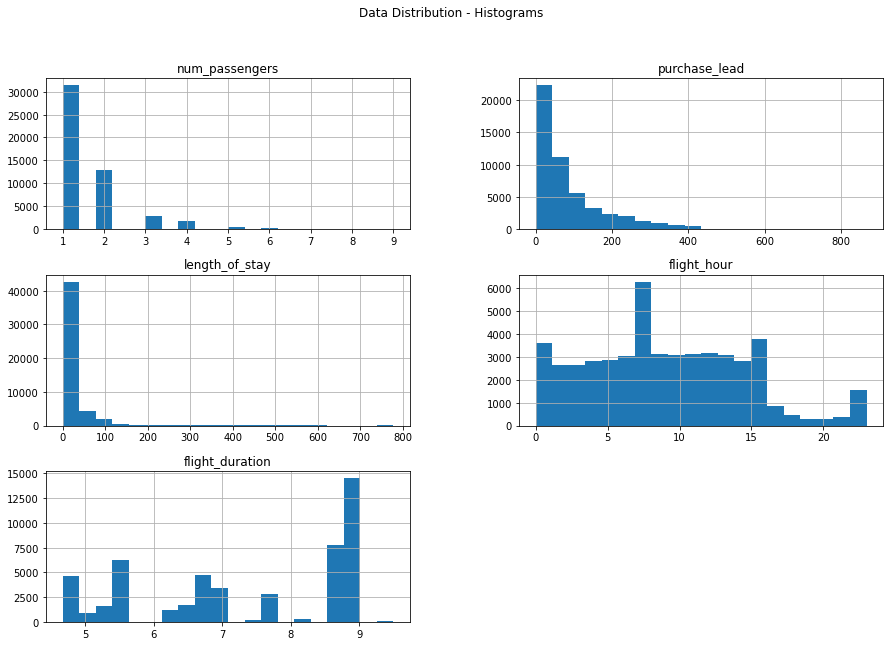

In [10]:
# Data Distribution - Histograms
numerical_columns = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
df[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle("Data Distribution - Histograms")
plt.show()

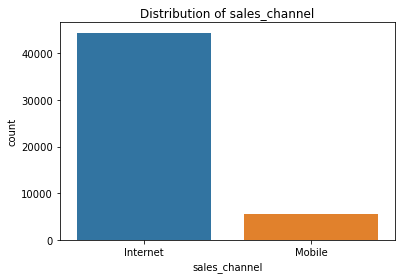

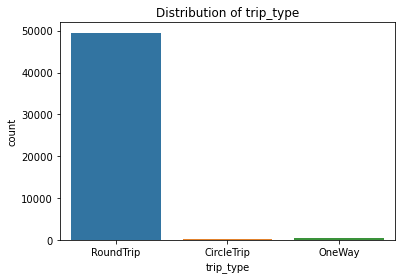

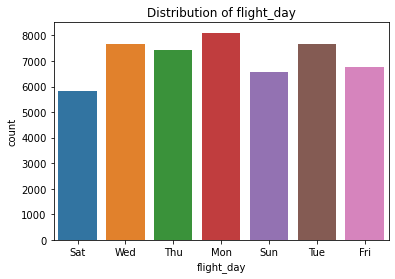

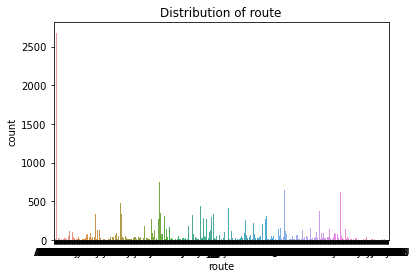

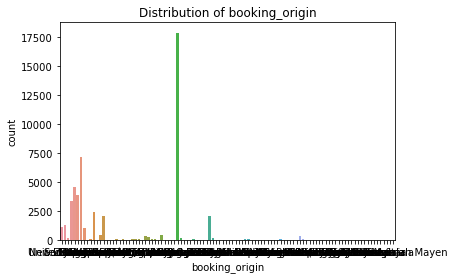

In [11]:
# Data Distribution - Categorical Variables
categorical_columns = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
for column in categorical_columns:
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()

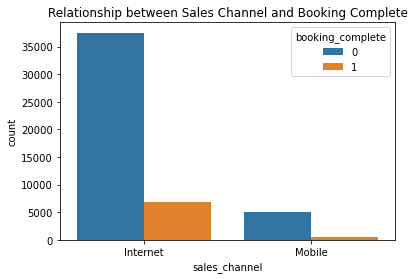

In [18]:
# Explore Relationships - Example: Sales Channel vs. Booking Complete
sns.countplot(x='sales_channel', hue='booking_complete', data=df)
plt.title("Relationship between Sales Channel and Booking Complete")
plt.show()

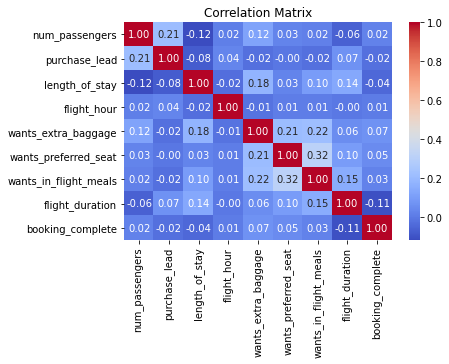

In [13]:
# Correlation Analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

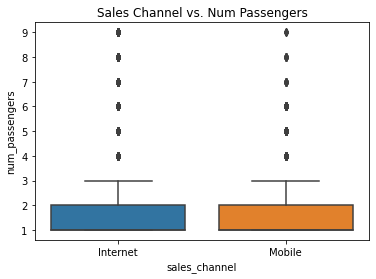

In [14]:
# Pattern Recognition - Example: Sales Channel vs. Num Passengers
sns.boxplot(x='sales_channel', y='num_passengers', data=df)
plt.title("Sales Channel vs. Num Passengers")
plt.show()

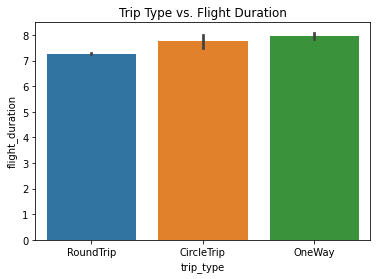

In [15]:
# Segmentation - Example: Trip Type vs. Flight Duration
sns.barplot(x='trip_type', y='flight_duration', data=df)
plt.title("Trip Type vs. Flight Duration")
plt.show()

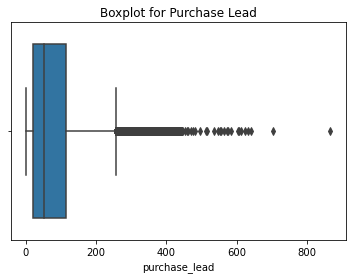

In [16]:
# Outlier Detection - Example: Boxplot for Purchase Lead
sns.boxplot(x='purchase_lead', data=df)
plt.title("Boxplot for Purchase Lead")
plt.show()

## Feature Engineering